# Simple Linear Correlation and Regression

**Importing Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

### Visualize the Data

In [3]:
url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

df = pd.read_csv(url)

df.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


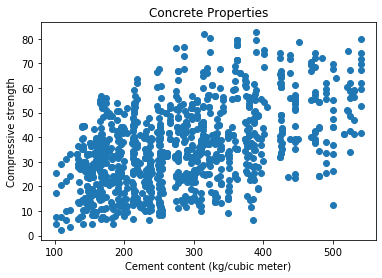

In [6]:
plt.scatter(x=df['cement'], y=df['strength'])
plt.xlabel('Cement content (kg/cubic meter)')
plt.ylabel('Compressive strength')
plt.title('Concrete Properties')

plt.show()

### Independent and Dependent Variables
- Identifying the target (dependent variable)
- Identifying the features (independent variables)

**Identifying features and targets**

You measure how the amount of sugar affects the taste of coffee. What are the dependent and independent variables?

- **Feature:** sugar amount

- **Target:** coffee taste

You would like to examine medication dosage and the severity of specific symptoms. What are the dependent and independent variables?

- **Feature:** medical dosage

- **Target:** symptons

You have measurements for the amount of a particular compound in the atmosphere and the average global temperature record for many thousands of years. What are the dependent and independent variables here? 

- **Feature:** amount of compound

- **Target:** global temperature

### Correlation in Concrete Dataset

In [2]:
url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

# Only using correlated column names
mycols = ['cement', 'water','coarse_agg', 'strength']
df = pd.read_csv(url, usecols=mycols)

### Degree of Correlation

We can measure how well two variables are correlated. This measurement ranges between -1 and 1:

- -1: Two variables are negatively correlated where an increase in one results in a decrease in the other
- 0: There is no linear relationship between two variables (though they can have a non-linear relationship
- +1: Two variables are positively correlated where an increase in one increases the other

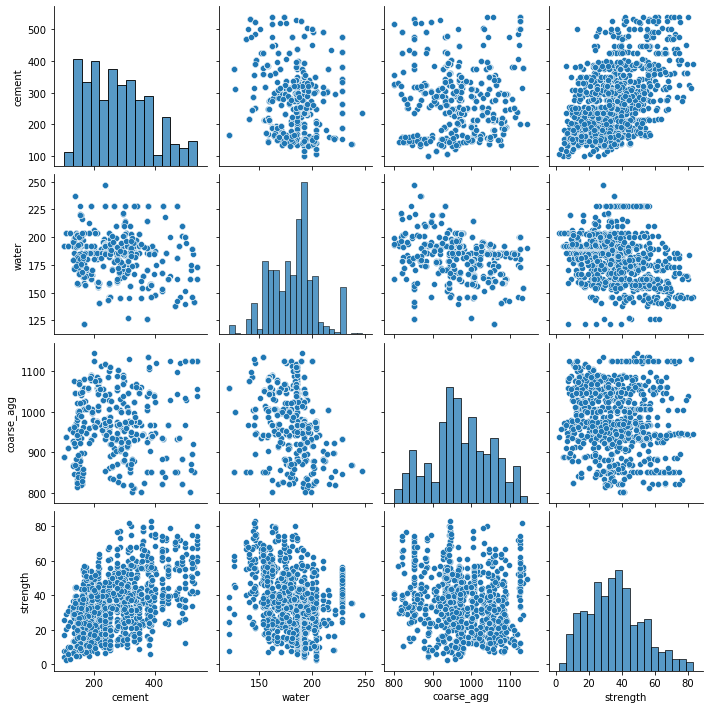

In [3]:
sns.pairplot(df)

plt.show()

**Calculating feature correlations**
- Pearson correlation coefficient

In [14]:
# Calculate the correlation coefficient
# (return only the coefficient)
strength_cement, _ = pearsonr(df['strength'], df['cement'])
strength_water, _ = pearsonr(df['strength'], df['water'])
strength_coarse_agg, _ = pearsonr(df['strength'], df['coarse_agg'])

print('The correlation between strength-cement:', round(strength_cement, 3))
print('The correlation between strength-water:', round(strength_water, 2))
print('The correlation between strength-coarse_agg:', round(strength_coarse_agg, 2))

The correlation between strength-cement: 0.498
The correlation between strength-water: -0.29
The correlation between strength-coarse_agg: -0.16


**Linear regression**
- Ordinary Least Squares
- Linear Equations

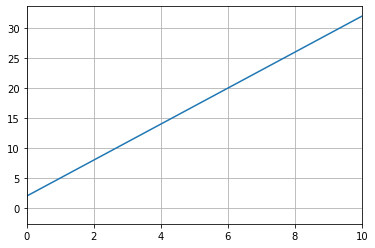

In [17]:
# Create our line
b_0 = 2 # intercept
b_1 = 3 # slope

x = np.linspace(-1, 10, 100)
y = b_0 + b_1 * x

# Plot the line
plt.plot(x,y)
plt.xlim([0, 10])
plt.grid()

plt.show()

### Linear Regression and Concrete Dataset
- load in the concrete data
- fit a linear regression
- look at the coefficients
- make a prediction

In [18]:
url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

df = pd.read_csv(url)

df.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
# Instantiate the class (with default parameters)
model = LinearRegression()

x = df['cement']
# Add a new axis to create a column vector 
# (scikit-learn expects the data to be in this shape)
X = x[:, np.newaxis]

y = df['strength']

model.fit(X, y)

LinearRegression()

In [29]:
# Slope (also called the model coefficient)
print('The slope: ', model.coef_)

# Intercept
print('The intercept: ', model.intercept_)

# In equation form
print('Best-fit line: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

The slope:  [0.07958034]
The intercept:  13.442528112399916
Best-fit line: y = 0.08x + 13.44


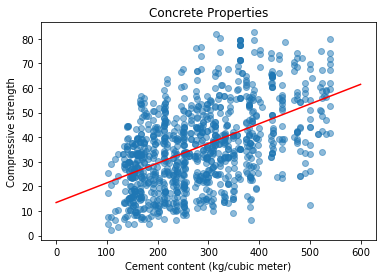

In [30]:
# Plot the data
plt.scatter(x=x, y=y, alpha=0.5)

# Plot the best-fit line
x_bestfit = np.linspace(0, 600, 10)
y_bestfit = 0.08*x_bestfit + 13.44
plt.plot(x_bestfit, y_bestfit, color='red')

plt.xlabel('Cement content (kg/cubic meter)')
plt.ylabel('Compressive strength')
plt.title('Concrete Properties')

plt.show()

### Making a Prediction

Lets say cement is 600

 y = 0.08x + 13.44 = 0.08*600 + 13.44 = 61 

Then the predicted strength would 61

### Calculate for water content

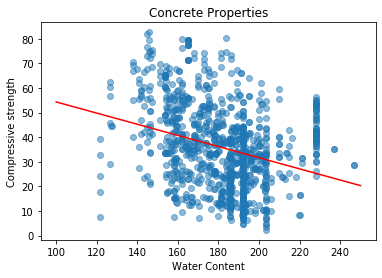

In [42]:
model = LinearRegression()

x = df['water']
X = x[:, np.newaxis]
y = df['strength']

# Fit Model
model.fit(X, y)

# Plot the data
plt.scatter(x=x, y=y, alpha=0.5)

# Plot the best-fit line
x_bestfit = np.linspace(100, 250, 10)
y_bestfit = model.coef_[0]*x_bestfit + model.intercept_
plt.plot(x_bestfit, y_bestfit, color='red')

plt.xlabel('Water Content')
plt.ylabel('Compressive strength')
plt.title('Concrete Properties')

plt.show()

In [55]:
# Making a prediction using .predict
model.predict([[200]])

array([31.64138799])

### Residual

In [37]:
url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

concrete = pd.read_csv(url)

concrete.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Using the fifth data point (index 4), we'll plug the cement content value of 198.6 into our linear regression equation. Recall the parameters for the best-fit line are:

$$ y = 0.08x + 13.44 $$

where y is the predicted concrete strength and x is the cement content. Substituting into our equation gives us:

$$ y = 0.08*198.6 + 13.44 = 29.3 $$

The observed strength value for this cement content was 44.3, so the residual is 44.30-29.3 = 15.

Not all residuals will be positive or even very large - some will be negative, and some will be very small and close to the prediction. The sum of the squares of all residuals is the crucial value and what we minimize when fitting a linear regression model.